### Analise Big O dos algoritmos

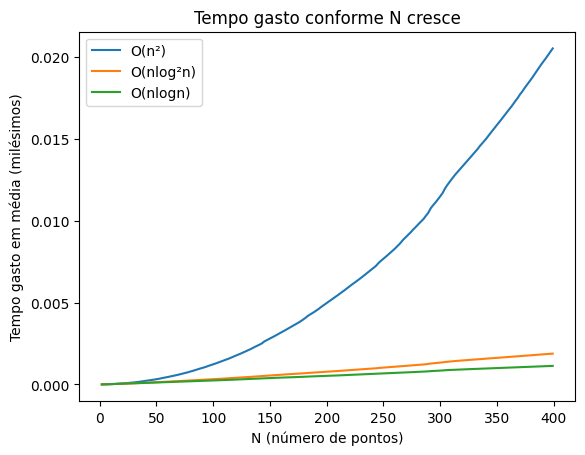

In [5]:
import math
import numpy as np
import matplotlib.pyplot as plt
from time import perf_counter

## Funções auxiliares

class Point():
    def __init__(self, x, y):
        self.x = x
        self.y = y

def merge_sort(arr, coord):

    if len(arr) == 1:
        return arr

    mid = len(arr) // 2
    pointsleft = arr[:mid]
    pointsright = arr[mid:]

    left_sorted = merge_sort(pointsleft, coord)
    right_sorted = merge_sort(pointsright, coord)
    cmbo = merge(left_sorted,right_sorted, coord)
    return cmbo

def merge(A, B, coord):

    i = j = 0
    C = []

    while i < len(A) and j < len(B):
        if getattr(A[i], coord) <= getattr(B[j], coord):
            C.append(A[i])
            i += 1

        elif getattr(B[j], coord) < getattr(A[i], coord):
            C.append(B[j])
            j += 1

    while i < len(A) and j == len(B):
        C.append(A[i])
        i += 1

    while j < len(B) and i == len(A):
        C.append(B[j])
        j += 1

    return C

def ordena_em_x_e_y(points):
    Px = merge_sort(points, 'x')
    Py = merge_sort(points, 'y')
    return Px,Py

def distancia_euclidiana_entre_dois_pontos(p1, p2):
    return math.sqrt((p1.x - p2.x)**2 + (p1.y - p2.y)**2)

def lista_mais_proxima(list, size, k):

    minimum = k
 
    for i in range(size):
        j = i + 1
        while j < size and (list[j].y -
                            list[i].y) < minimum:
            minimum = distancia_euclidiana_entre_dois_pontos(list[i], list[j])
            j += 1
 
    return minimum

def força_bruta(arr):
    size = len(arr)
    minimum_distance = distancia_euclidiana_entre_dois_pontos(arr[0], arr[1])
    target_pair = Point(arr[0], arr[1])

    if len(arr) == 2:
        return distancia_euclidiana_entre_dois_pontos(arr[0], arr[1]), arr[0], arr[1]

    for i in range(0,size):
        for j in range(i+1,size):
            distance = distancia_euclidiana_entre_dois_pontos(arr[i], arr[j])
            if distance < minimum_distance:
                minimum_distance = distance
                target_pair = Point(arr[i], arr[j])

    return minimum_distance, target_pair

def parMaisProximo2(points, points_close, n):

    if n <= 3:
        return força_bruta(points)

    mid = n // 2
    midpoint = points[mid]

    pointsleft = points[:mid]
    pointsright = points[mid:]

    kleft = parMaisProximo2(pointsleft, points_close, mid)
    kright = parMaisProximo2(pointsright, points_close, n - mid)

    k = 0
    if kleft[0] < kright[0]:
        k = kleft
    else:
        k = kright

    list_points = []
    list_close = []
    lr = pointsleft + pointsright
    for i in range(n):
        if abs(lr[i].x - midpoint.x) < k[0]:
            list_points.append(lr[i])
        if abs(points_close[i].x - midpoint.x) < k[0]:
            list_close.append(points_close[i])
 
    list_points.sort(key = lambda point: point.y)
    min1 = min(k[0], lista_mais_proxima(list_points, len(list_points), k[0]))
    min2 = min(k[0], lista_mais_proxima(list_close, len(list_close), k[0]))
     
    return (min(min1,min2), list_close, points_close)

def parMaisProximoHOF2(points, n):
    Px, Py = ordena_em_x_e_y(points)

    return parMaisProximo2(Px, Py, n)

#-----------------------------------

def parMaisProximo3(Px,Py):

    if len(Px) <= 3:
        return força_bruta(Px)

    midpoint_x = len(Px) // 2
    Qx = Px[:midpoint_x]
    Rx = Px[midpoint_x:]
    median_x = Px[midpoint_x]
    Qy,Ry = [], []
    
    for point in Py:
        if point.x < int(median_x.x):
            Qy.append(point)
        else:
            Ry.append(point)

    min_distance_left = parMaisProximo3(Qx, Qy)
    min_distance_right = parMaisProximo3(Rx, Ry)
    min_distance = 0
    
    if min_distance_left[0] < min_distance_right[0]:
        min_distance = min_distance_left
    else:
        min_distance = min_distance_right

    x_bar = Qx[-1].x
    Sy = []

    for point in Py:
        if x_bar - min_distance[0] < point.x < x_bar + min_distance[0]:
            Sy.append(point)
    
    for i in range(len(Sy) - 1):
        for j in range(i+1, min(i + 7, len(Sy))):
            points = Sy[i]
            points_close = Sy[j]
            dist = distancia_euclidiana_entre_dois_pontos(points, points_close)

            if dist < min_distance[0]:
                min_distance = (dist, points, points_close)

    return min_distance

def parMaisProximoHOF3(points):
    Px, Py = ordena_em_x_e_y(points)
    return parMaisProximo3(Px,Py)

simulações = 10

n_vetor = []
tempos1 = []
tempos_media_1 = []
tempos2 = []
tempos_media_2 = []
tempos3 = []
tempos_media_3 = []

for n in range(2,400):

    for _i in range(simulações):
        
        entrada = []
        for j in range (0,n):
            entrada.append(Point(np.random.randint(1000),np.random.randint(1000)))

        t1_start = perf_counter()
        força_bruta(entrada)
        t1_stop = perf_counter()
        tempo_gasto = t1_stop - t1_start
        tempos1.append(tempo_gasto)

        Px, Py = ordena_em_x_e_y(entrada)
        t1_start = perf_counter()
        parMaisProximo2(Px,Py,len(entrada))
        t1_stop = perf_counter()
        tempo_gasto = t1_stop - t1_start
        tempos2.append(tempo_gasto)

        t1_start = perf_counter()
        parMaisProximo3(Px,Py)
        t1_stop = perf_counter()
        tempo_gasto = t1_stop - t1_start
        tempos3.append(tempo_gasto)
    
    tempos_media_1.append(np.mean(tempos1))
    tempos_media_2.append(np.mean(tempos2))
    tempos_media_3.append(np.mean(tempos3))
    n_vetor.append(n)

plt.plot(n_vetor,tempos_media_1, label="O(n²)")
plt.plot(n_vetor,tempos_media_3, label="O(nlog²n)")
plt.plot(n_vetor,tempos_media_2, label="O(nlogn)")
plt.title("Tempo gasto conforme N cresce")
plt.xlabel("N (número de pontos)")
plt.ylabel("Tempo gasto em média (milésimos)")
plt.legend()
plt.show()